
🔹 Logistic Regression
Accuracy: 0.7228915662650602
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       237
           1       0.66      0.75      0.70       235
           2       0.71      0.59      0.64       109

    accuracy                           0.72       581
   macro avg       0.72      0.70      0.71       581
weighted avg       0.73      0.72      0.72       581



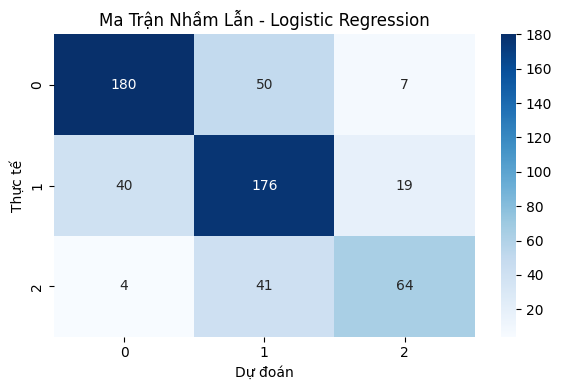


🔹 Random Forest
Accuracy: 0.9070567986230637
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       237
           1       0.87      0.91      0.89       235
           2       0.94      0.80      0.86       109

    accuracy                           0.91       581
   macro avg       0.91      0.89      0.90       581
weighted avg       0.91      0.91      0.91       581



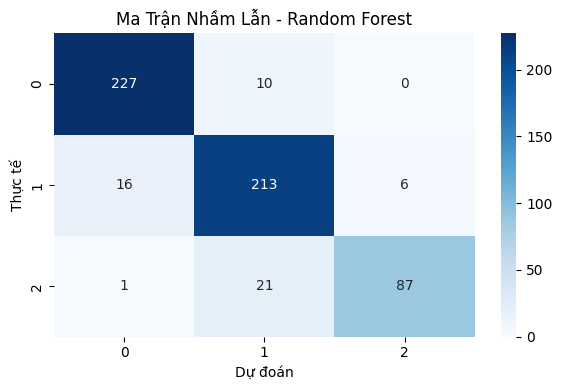


🔹 XGBoost
Accuracy: 0.9621342512908778
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       237
           1       0.96      0.95      0.96       235
           2       0.98      0.94      0.96       109

    accuracy                           0.96       581
   macro avg       0.97      0.96      0.96       581
weighted avg       0.96      0.96      0.96       581



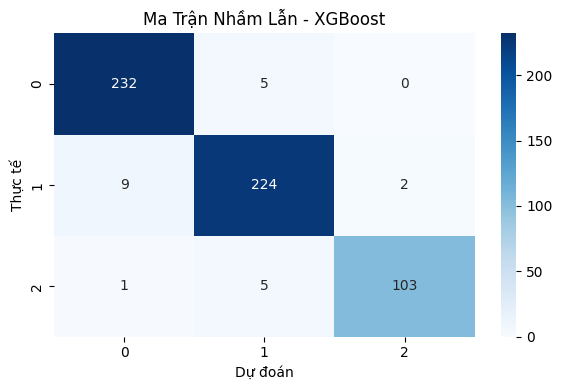


🔹 KNN
Accuracy: 0.6867469879518072
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       237
           1       0.63      0.71      0.67       235
           2       0.72      0.47      0.57       109

    accuracy                           0.69       581
   macro avg       0.70      0.65      0.66       581
weighted avg       0.69      0.69      0.68       581



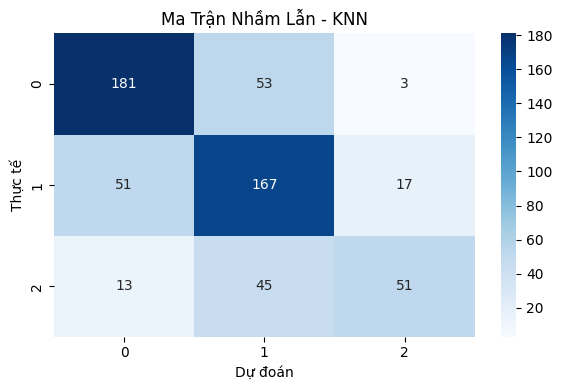

['feature_columns.pkl']

In [1]:
import pandas as pd
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

df = pd.read_excel("/kaggle/input/chiuchiu/Data_credit_updated.xlsx")
df["Kn_tra_no"] = pd.to_numeric(df["Kn_tra_no"], errors="coerce")
df = df.dropna(subset=["Kn_tra_no"])
df["Kn_tra_no"] = df["Kn_tra_no"].astype(int)
y = df["Kn_tra_no"]
X = df[["Tuoi", "Tt_hon_nhan", "Tt_cv", "Thu_nhap", "Chi_tieu", "Tien_dien",
        "Ts_the_chap", "Tt_sh_nha", "So_tien_vay", "Md_vay", "Th_kvay",
        "Cm_thu_nhap", "Nguoi_phu_thuoc", "Td_hoc_van"]]

X_encoded = pd.get_dummies(X, columns=["Tt_hon_nhan", "Ts_the_chap", "Tt_sh_nha",
                                       "Md_vay", "Cm_thu_nhap", "Td_hoc_van"])

X_encoded = X_encoded.dropna()
y = y.loc[X_encoded.index]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n🔹 {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
    plt.title(f"Ma Trận Nhầm Lẫn - {name}")
    plt.xlabel("Dự đoán")
    plt.ylabel("Thực tế")
    plt.tight_layout()
    plt.show()
    

models["XGBoost"].save_model("xgb_model.json")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(X_encoded.columns.tolist(), "feature_columns.pkl")
